# Solution sketch, lab 13

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns



In [6]:
from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)



In [16]:
wt_data = pd.read_csv("http://jmaurit.github.io/analytics/labs/data/wt_data2.csv")

In the *wt_data* data set we have information on net-exchange data for different countries and price areas in the Nordic exchange. That is, this indicates how much net import or export a country/area experiences over the course of an hour. Consider the net exchange series for DK1 and DK2: *DK1_nx* and *DK2_nx*. 

  a. Are these series stationary? Use and interpret with an appropriate test. Does the stationarity or non-stationarity of these series have some economic interpretation? If so, what does it say about these series? 
  
  b. Estimate what the effect of wind power is on net exchange in these two areas using OLS. Are there any lagged effects? Should you include any controlling variables? Such as prices, the other areas wind power, etc? Explain why or why not? Interpret the results. 
  
  c. Check the residuals for serial correlation (look at ACF and pACF figures). What effect does this have on our results or interpretation of results? If there are serial correlation, we should probably model the dynamics directly in our model, for example by including autoregressive (AR) terms in our regression. Will that effect how we interpret the exogenous coefficients (wind power)? [Chapter 9](https://otexts.com/fpp3/dynamic.html) parts 1-2 could be a useful reference in answering this question.  
  
  d. Throughout this lab, we have assumed that wind power is exogenous. That is, when we include it as an independent variable, we interpret the coefficients as causal. Is this justified? Why? What if we included price as a variable in the regresion in c. Should we interpret price as exogenous? 
 

In [18]:
#a
wt_data["time"] = pd.to_datetime(wt_data.time, format="%Y-%m-%d %H:%M:%S")
wt_data["date"] = pd.to_datetime(wt_data.time, format="%Y-%m-%d")




In [22]:
NX_df = wt_data[["time", "DK1_nx", "DK2_nx"]].copy()

In [26]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
NX_df = NX_df.loc[NX_df.DK1_nx.notna(),:]



In [28]:
dftest = adfuller(NX_df["DK1_nx"], autolag="AIC") 
dftest


(-13.999479264524549,
 3.885357527932379e-26,
 48,
 26252,
 {'1%': -3.4305991215729548,
  '5%': -2.861650104424084,
  '10%': -2.5668286053253606},
 340929.444772873)

Here we have a large-in-magnitude statistic, which gives us quite a lot of confidence in rejecting the null-hypothesis of non-stationarity. 

,date,time,hour,wind_SE1,wind_SE2,wind_SE3,wind_SE4,wind_DK1,wind_DK2,SE_nx,...,PLAtoPL_cap,PLtoPLA_cap,SE4toLT_cap,LTtoSE4_cap,SYSEurMW,SE4EurMW,DK1EurMW,DK2EurMW,hour_ind,month
0,2016-01-01 00:00:00,2016-01-01 00:00:00,00 - 01,420.0,1247.0,432.0,208.0,1314.0,113.0,-2621.0,...,0.0,3600.0,0.0,0.0,1639.0,1639.0,1639.0,1639.0,0,m1
1,2016-01-01 01:00:00,2016-01-01 01:00:00,01 - 02,416.0,1214.0,419.0,187.0,1267.0,98.0,-2274.0,...,0.0,3900.0,0.0,0.0,1604.0,1604.0,1604.0,1604.0,1,m1
2,2016-01-01 02:00:00,2016-01-01 02:00:00,02 - 03,417.0,1227.0,378.0,177.0,1159.0,74.0,-2370.0,...,0.0,3900.0,0.0,0.0,1574.0,1574.0,1574.0,1574.0,2,m1
3,2016-01-01 03:00:00,2016-01-01 03:00:00,03 - 04,424.0,1232.0,357.0,173.0,1160.0,61.0,-2541.0,...,0.0,4000.0,0.0,0.0,1557.0,1557.0,1557.0,1557.0,3,m1
4,2016-01-01 04:00:00,2016-01-01 04:00:00,04 - 05,412.0,1245.0,326.0,161.0,1069.0,47.0,-2616.0,...,0.0,4100.0,0.0,0.0,1547.0,1547.0,1547.0,1547.0,4,m1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2018-12-31 19:00:00,2018-12-31 19:00:00,19 - 20,NaN,NaN,NaN,NaN,3335.0,800.0,-5452.0,...,2019.0,1011.0,700.0,281.0,4883.0,4751.0,4751.0,4751.0,19,m12
26300,2018-12-31 20:00:00,2018-12-31 20:00:00,20 - 21,NaN,NaN,NaN,NaN,3147.0,865.0,-4919.0,...,976.0,1551.0,700.0,220.0,4723.0,4582.0,4582.0,4582.0,20,m12
26301,2018-12-31 21:00:00,2018-12-31 21:00:00,21 - 22,NaN,NaN,NaN,NaN,2859.0,902.0,-4493.0,...,208.0,2229.0,700.0,204.0,4602.0,4303.0,4303.0,4303.0,21,m12
26302,2018-12-31 22:00:00,2018-12-31 22:00:00,22 - 23,NaN,NaN,NaN,NaN,2708.0,792.0,-4165.0,...,0.0,2800.0,700.0,148.0,4555.0,3854.0,3854.0,3854.0,22,m12


We could start with a simple model of net exchange on wind and some lags: 

In [36]:
wt_data.sort_values('time', inplace=True)
wt_data.set_index('time', inplace=True)

wt_data["wind_DK1_l"] = wt_data.wind_DK1.shift(freq="1H") #shift 1 hour
wt_data["wind_DK1_l2"] = wt_data.wind_DK1.shift(freq="2H") #shift 1 hour
wt_data["wind_DK1_l3"] = wt_data.wind_DK1.shift(freq="3H") #shift 1 hour



In [38]:
nxmod1 = smf.ols(formula="DK1_nx ~ wind_DK1 + wind_DK1_l + wind_DK1_l2 + wind_DK1_l3", data=wt_data).fit()
nxmod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK1_nx   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.727e+04
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:57:45   Log-Likelihood:            -1.9764e+05
No. Observations:               26289   AIC:                         3.953e+05
Df Residuals:                   26284   BIC:                         3.953e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1037.7421      4.630    224.128      0.000    1028.667    1046.817
wind_DK1       -0.8502      0.027    -31.086      0.000      -0.904      -0.797
wind_DK1_l      0.0383      0.050      0.766      0.444      -0.060       0.136
wind_DK1_l2     0.0165      0.050      0.331      0.741      -0.081       0.115
wind_DK1_l3    -0.0179      0.027     -0.656      0.512      -0.072       0.036
==============================================================================
Omnibus:                       45.600   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.867
Skew:                           0.055   Prob(JB):                     1.34e-09
Kurtosis:                       2.842   Cond. No.                     4.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient on the concurrent term is strongly negative, but the lagged terms are all close to zero and not significant. We could probably exclude these

In [41]:
nxmod1_resids = nxmod1.resid

In [30]:
#let us first look at the autocorrelations left
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



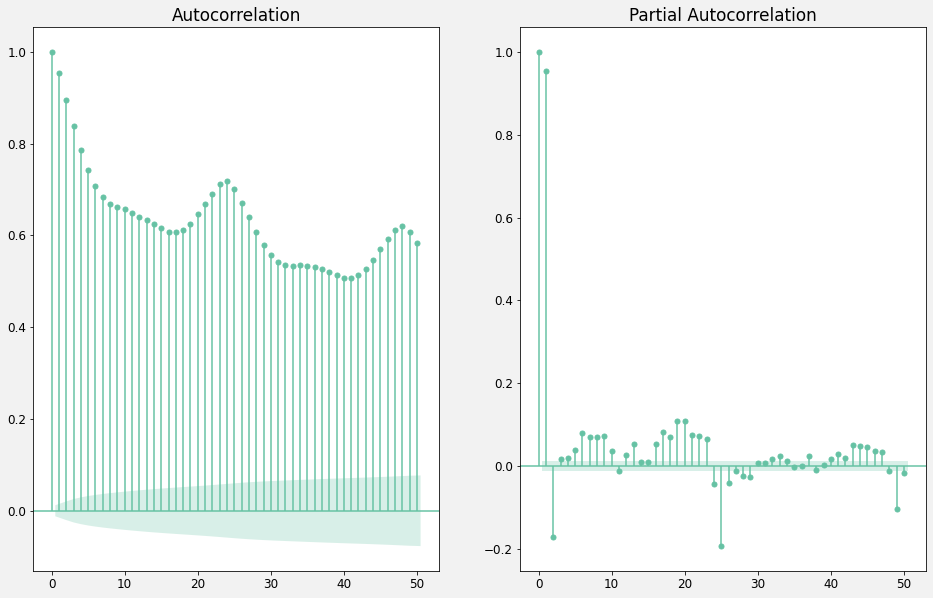

In [42]:
fig, ax = plt.subplots(1,2)
plot_acf(nxmod1_resids, lags=50, ax=ax[0])
plot_pacf(nxmod1_resids, lags=50, ax=ax[1])
plt.show()

From the autocorrelation and partial autocorellation charts, we see quite a bit of autocorrelation in the residuals, which we probably want to model at least partially in our model. let us add some autoregressive terms

In [43]:
wt_data["DK1_nx_l"] = wt_data.DK1_nx.shift(freq="1H") #shift 1 hour
wt_data["DK1_nx_l2"] = wt_data.DK1_nx.shift(freq="2H") #shift 2 hour
wt_data["DK1_nx_l3"] = wt_data.DK1_nx.shift(freq="3H") #shift 3 hour
wt_data["DK1_nx_l24"] = wt_data.DK1_nx.shift(freq="24H") #shift 24 hour





In [46]:
nxmod1 = smf.ols(formula="DK1_nx ~ DK1_nx_l + DK1_nx_l2 + DK1_nx_l3 + DK1_nx_l24 + wind_DK1", data=wt_data).fit()
nxmod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK1_nx   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.446e+05
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:06:04   Log-Likelihood:            -1.7038e+05
No. Observations:               26265   AIC:                         3.408e+05
Df Residuals:                   26259   BIC:                         3.408e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.3521      2.764     42.094      0.000     110.934     121.770
DK1_nx_l       1.1638      0.006    185.039      0.000       1.151       1.176
DK1_nx_l2     -0.2317      0.009    -24.545      0.000      -0.250      -0.213
DK1_nx_l3     -0.0534      0.006     -8.946      0.000      -0.065      -0.042
DK1_nx_l24     0.0223      0.001     16.217      0.000       0.020       0.025
wind_DK1      -0.0921      0.002    -44.401      0.000      -0.096      -0.088
==============================================================================
Omnibus:                     1735.319   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8130.853
Skew:                           0.110   Prob(JB):                         0.00
Kurtosis:                       5.717   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

adding the autocorrelation now reduces the magnitude of the our wind variable by a lot, though it is still significant. We could generally interpret this to say that 1 extra mwh of wind power increases net export (which is a negative here) by .09 MW.

In the next lab we will refine this type of modelling with ARMA modelling